<a href="https://colab.research.google.com/github/sricharan0510/Previous-Learnings/blob/main/BVRC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bias on Test Set: 1413.90
Variance on Test Set: 742935582.46
MSE on Test Set: 21026037.33
Average Bias across CV: 16.85
Average Variance across CV: 632370656.64
Average MSE across CV: 33745311.17


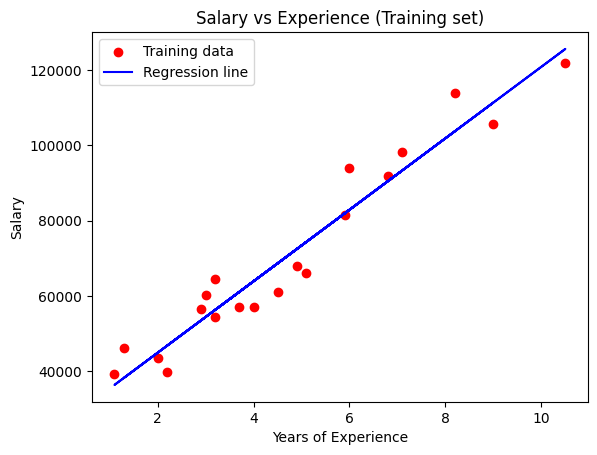

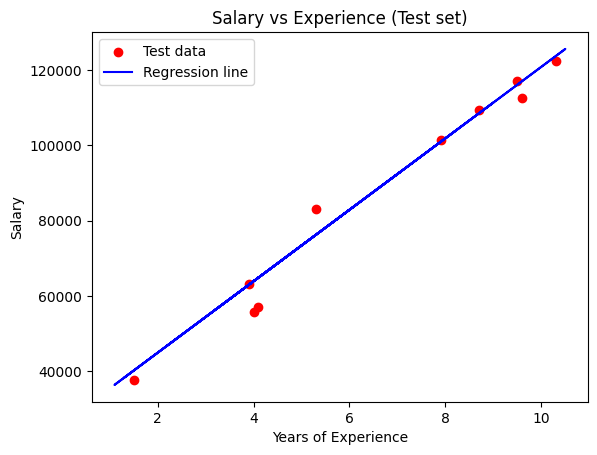

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Load and preprocess the dataset
dataset = pd.read_csv('salary_data.csv').drop_duplicates()
X = dataset.iloc[:, :-1].values  # Independent variable
y = dataset.iloc[:, -1].values   # Dependent variable

# 2. Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# 3. Train the regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# 4. Predict the test set results
y_pred = regressor.predict(X_test)

# 5. Calculate bias, variance, and mean squared error
bias = np.mean(y_pred - y_test)
variance = np.var(y_pred)
mse = mean_squared_error(y_test, y_pred)

# 6. Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)
cv_bias, cv_variance, cv_mse = [], [], []

for train_idx, test_idx in kf.split(X):
    regressor.fit(X[train_idx], y[train_idx])
    y_cv_pred = regressor.predict(X[test_idx])
    cv_bias.append(np.mean(y_cv_pred - y[test_idx]))
    cv_variance.append(np.var(y_cv_pred))
    cv_mse.append(mean_squared_error(y[test_idx], y_cv_pred))

avg_cv_bias = np.mean(cv_bias)
avg_cv_variance = np.mean(cv_variance)
avg_cv_mse = np.mean(cv_mse)

# 7. Output results
print(f"Bias on Test Set: {bias:.2f}")
print(f"Variance on Test Set: {variance:.2f}")
print(f"MSE on Test Set: {mse:.2f}")
print(f"Average Bias across CV: {avg_cv_bias:.2f}")
print(f"Average Variance across CV: {avg_cv_variance:.2f}")
print(f"Average MSE across CV: {avg_cv_mse:.2f}")

# 8. Visualize results (optional)
plt.scatter(X_train, y_train, color='red', label='Training data')
plt.plot(X_train, regressor.predict(X_train), color='blue', label='Regression line')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

plt.scatter(X_test, y_test, color='red', label='Test data')
plt.plot(X_train, regressor.predict(X_train), color='blue', label='Regression line')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()